<a href="https://colab.research.google.com/github/gankidisaicharan/Currency-Prediction/blob/main/Upgraded_CurrencyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from os import listdir
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import imutils
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle #shuffling the data improves the model

In [ ]:
from bing_image_downloader import downloader
import os

currencies = {
 "US dollar": ["1 dollar", "2 dollars", "5 dollars", "10 dollars", "20 dollars", "50 dollars", "100 dollars"],
    "Euro": ["5 euro", "10 euro", "20 euro", "50 euro", "100 euro", "200 euro", "500 euro"],
    "Japanese yen": ["1000 yen", "2000 yen", "5000 yen", "10000 yen"],
    "British pound": ["5 pounds", "10 pounds", "20 pounds", "50 pounds"],
    "Australian dollar": ["5 dollars", "10 dollars", "20 dollars", "50 dollars", "100 dollars"],
    "Indian rupee": ["1 rupee", "2 rupees", "5 rupees", "10 rupees", "20 rupees", "50 rupees", "100 rupees", "200 rupees", "500 rupees", "2000 rupees"]
}

directory = "/content/drive/MyDrive/PROJECTS/Currency prediction/Data"

for currency, denominations in currencies.items():
    for denomination in denominations:
        keyword = f"{currency} {denomination}"
        downloader.download(keyword, limit=50, output_dir=directory, adult_filter_off=True, force_replace=False, timeout=60)


In [ ]:
import os

# Directory containing the banknote images
directory = "/content/drive/MyDrive/PROJECTS/Currency prediction/Data"

# Loop over each folder in the directory and count the number of images
for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)):
        image_dir = os.path.join(directory, folder)
        num_images = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
        print(f"{folder}: {num_images} images")


US dollar 1 dollar: 35 images
US dollar 2 dollars: 25 images
US dollar 5 dollars: 39 images
US dollar 10 dollars: 28 images
US dollar 20 dollars: 28 images
US dollar 50 dollars: 32 images
US dollar 100 dollars: 37 images
Euro 5 euro: 36 images
Euro 10 euro: 39 images
Euro 20 euro: 33 images
Euro 50 euro: 31 images
Euro 100 euro: 36 images
Euro 200 euro: 35 images
Euro 500 euro: 30 images
British pound 5 pounds: 32 images
British pound 10 pounds: 28 images
British pound 20 pounds: 32 images
British pound 50 pounds: 30 images
Australian dollar 5 dollars: 39 images
Australian dollar 10 dollars: 31 images
Australian dollar 20 dollars: 32 images
Australian dollar 50 dollars: 34 images
Australian dollar 100 dollars: 32 images
Indian rupee 10 rupees: 19 images
Indian rupee 20 rupees: 23 images
Indian rupee 50 rupees: 26 images
Indian rupee 100 rupees: 30 images
Indian rupee 200 rupees: 23 images
Indian rupee 500 rupees: 21 images
Indian rupee 2000 rupees: 15 images


In [ ]:
def augment_data(data_dir, output_dir, n_generated_samples):
    class_names = ['Australian dollar 10 dollars', 'Australian dollar 100 dollars','Australian dollar 20 dollars', 'Australian dollar 5 dollars', 'Australian dollar 50 dollars', 'British pound 10 pounds', 'British pound 20 pounds', 'British pound 5 pounds', 'British pound 50 pounds', 'Euro 10 euro', 'Euro 100 euro', 'Euro 20 euro', 'Euro 200 euro', 'Euro 5 euro', 'Euro 50 euro', 'Euro 500 euro', 'Indian rupee 10 rupees', 'Indian rupee 100 rupees', 'Indian rupee 20 rupees', 'Indian rupee 200 rupees', 'Indian rupee 2000 rupees', 'Indian rupee 50 rupees', 'Indian rupee 500 rupees', 'US dollar 1 dollar', 'US dollar 10 dollars', 'US dollar 100 dollars', 'US dollar 2 dollars', 'US dollar 20 dollars', 'US dollar 5 dollars', 'US dollar 50 dollars']

    datagen = ImageDataGenerator(rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode='nearest'
                                 )

    for class_name in class_names:
        print(class_name)
        class_dir = join(data_dir, class_name)
        output_class_dir = join(output_dir, class_name)
        if not exists(output_class_dir):
            makedirs(output_class_dir)
        for filename in listdir(class_dir):
            image = cv2.imread(join(class_dir, filename))
            if image is not None:
                # reshape the image
                image = image.reshape((1,)+image.shape)
                save_prefix = 'aug_' + filename[:-4]
                i=0
                for batch in datagen.flow(x=image, batch_size=1, save_to_dir=output_class_dir, save_prefix=save_prefix, save_format='jpg'):
                    i += 1
                    if i > n_generated_samples:
                        break
            else:
                print(f"Could not read image file: {join(class_dir, filename)}")


In [ ]:
data_dir = '/content/drive/MyDrive/PROJECTS/Currency prediction/Data'
output_dir = '/content/drive/MyDrive/PROJECTS/Currency prediction/aug'

n_generated_samples = 5

augment_data(data_dir, output_dir, n_generated_samples)


Australian dollar 10 dollars
Australian dollar 100 dollars
Could not read image file: /content/drive/MyDrive/PROJECTS/Currency prediction/Data/Australian dollar 100 dollars/Image_7.gif


In [ ]:
import os

# Directory containing the banknote images
directory = '/content/drive/MyDrive/PROJECTS/Currency prediction/aug'

# Loop over each folder in the directory and count the number of images
for folder in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, folder)):
        image_dir = os.path.join(directory, folder)
        num_images = len([f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))])
        print(f"{folder}: {num_images} images")


Australian dollar 20 dollars: 266 images
Australian dollar 5 dollars: 234 images
Australian dollar 50 dollars: 204 images
British pound 10 pounds: 168 images
British pound 20 pounds: 192 images
British pound 5 pounds: 192 images
British pound 50 pounds: 180 images
Euro 10 euro: 234 images
Euro 100 euro: 216 images
Euro 20 euro: 198 images
Euro 200 euro: 210 images
Euro 5 euro: 216 images
Euro 50 euro: 186 images
Euro 500 euro: 174 images
Indian rupee 10 rupees: 114 images
Indian rupee 100 rupees: 180 images
Indian rupee 20 rupees: 137 images
Indian rupee 200 rupees: 138 images
Indian rupee 2000 rupees: 90 images
Indian rupee 50 rupees: 156 images
Indian rupee 500 rupees: 126 images
US dollar 1 dollar: 210 images
US dollar 10 dollars: 168 images
US dollar 100 dollars: 222 images
US dollar 2 dollars: 144 images
US dollar 20 dollars: 167 images
US dollar 5 dollars: 234 images
US dollar 50 dollars: 192 images
Australian dollar 10 dollars: 186 images
Australian dollar 100 dollars: 186 image

In [ ]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/PROJECTS/Currency prediction/Data"
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Australian dollar 10 dollars' 'Australian dollar 100 dollars'
 'Australian dollar 20 dollars' 'Australian dollar 5 dollars'
 'Australian dollar 50 dollars' 'British pound 10 pounds'
 'British pound 20 pounds' 'British pound 5 pounds'
 'British pound 50 pounds' 'Euro 10 euro' 'Euro 100 euro' 'Euro 20 euro'
 'Euro 200 euro' 'Euro 5 euro' 'Euro 50 euro' 'Euro 500 euro'
 'Indian rupee 10 rupees' 'Indian rupee 100 rupees'
 'Indian rupee 20 rupees' 'Indian rupee 200 rupees'
 'Indian rupee 2000 rupees' 'Indian rupee 50 rupees'
 'Indian rupee 500 rupees' 'US dollar 1 dollar' 'US dollar 10 dollars'
 'US dollar 100 dollars' 'US dollar 2 dollars' 'US dollar 20 dollars'
 'US dollar 5 dollars' 'US dollar 50 dollars']


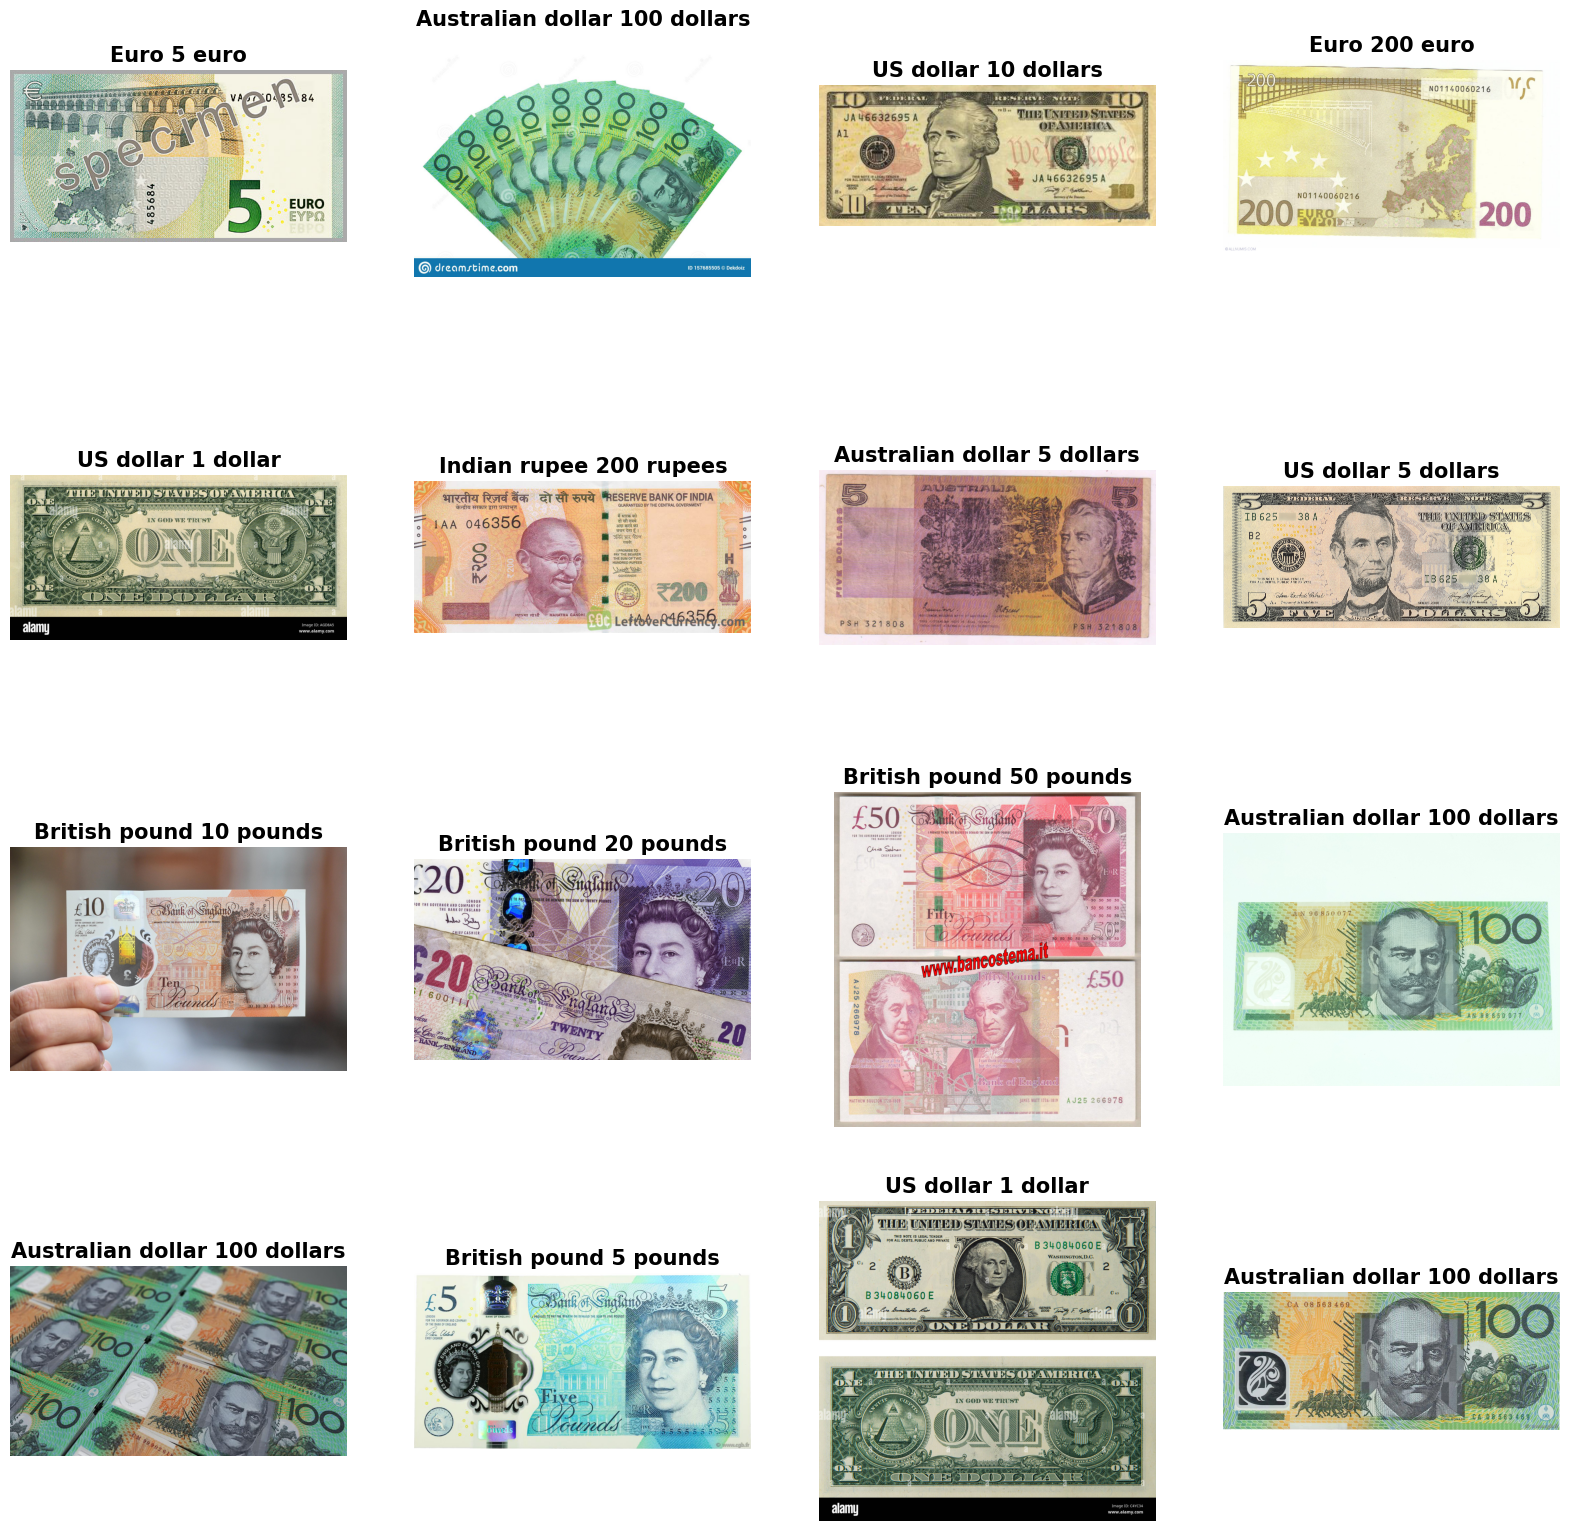

In [ ]:
import os
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0,29)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 15, fontweight = 'bold')
    plt.imshow(image)

In [ ]:
import tensorflow as tf
batch_size = 32
img_height = 224
img_width = 224
num_classes = 16
data_dir = '/content/drive/MyDrive/PROJECTS/Currency prediction/aug'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='training'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset='validation'
)


Found 5520 files belonging to 30 classes.
Using 4416 files for training.
Found 5520 files belonging to 30 classes.
Using 1104 files for validation.


#Transfer Learning

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=validation_split)

# Load the training data
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/PROJECTS/Currency prediction/aug",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

# Use a portion of the training data for validation
val_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/PROJECTS/Currency prediction/aug",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/PROJECTS/Currency prediction/Data",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False)

In [ ]:
batch_size = 32
num_epochs = 100
learning_rate = 0.001
validation_split = 0.2

In [ ]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(30, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(optimizer=Adam(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[earlystop])


Found 909 images belonging to 30 classes.
Found 909 images belonging to 30 classes.
Epoch 1/100
28/28 [==============================] - 71s 2s/step - loss: 2.9752 - accuracy: 0.2201 - val_loss: 1.9402 - val_accuracy: 0.4643
Epoch 2/100
28/28 [==============================] - 76s 3s/step - loss: 2.0530 - accuracy: 0.4094 - val_loss: 1.3876 - val_accuracy: 0.5938
Epoch 3/100
28/28 [==============================] - 77s 3s/step - loss: 1.5931 - accuracy: 0.5279 - val_loss: 1.0408 - val_accuracy: 0.6808
Epoch 4/100
28/28 [==============================] - 78s 3s/step - loss: 1.2314 - accuracy: 0.6214 - val_loss: 0.8159 - val_accuracy: 0.7522
Epoch 5/100
28/28 [==============================] - 78s 3s/step - loss: 1.0306 - accuracy: 0.6719 - val_loss: 0.6450 - val_accuracy: 0.8013
Epoch 6/100
28/28 [==============================] - 76s 3s/step - loss: 0.8868 - accuracy: 0.7366 - val_loss: 0.4743 - val_accuracy: 0.8650
Epoch 7/100
28/28 [==============================] - 77s 3s/step - los

In [ ]:
model_evaluate = model.evaluate(val_generator)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

29/29 [==============================] - 30s 1s/step - loss: 0.1349 - accuracy: 0.9670
Accuracy: % 96.70
Loss: % 13.49


In [ ]:
model.save('/content/drive/MyDrive/PROJECTS/Currency prediction/models/model-96.76%.h5')


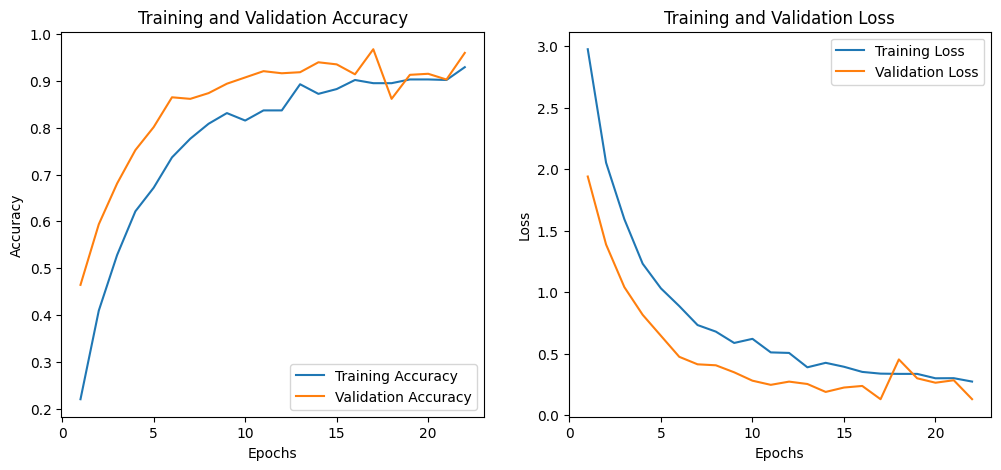

In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
plot_training_history(history)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

print('Classification Report:')
print(classification_report(y_true, y_pred_classes, target_names=class_names))

conf_mat = confusion_matrix(y_true, y_pred_classes)

29/29 [==============================] - 29s 964ms/step
Classification Report:
                               precision    recall  f1-score   support

 Australian dollar 10 dollars       0.94      1.00      0.97        31
Australian dollar 100 dollars       0.97      0.97      0.97        31
 Australian dollar 20 dollars       0.94      0.97      0.95        32
  Australian dollar 5 dollars       0.97      1.00      0.99        39
 Australian dollar 50 dollars       1.00      0.91      0.95        34
      British pound 10 pounds       0.97      1.00      0.98        28
      British pound 20 pounds       0.97      0.88      0.92        32
       British pound 5 pounds       0.97      0.97      0.97        32
      British pound 50 pounds       0.91      0.97      0.94        30
                 Euro 10 euro       0.97      1.00      0.99        39
                Euro 100 euro       1.00      1.00      1.00        36
                 Euro 20 euro       1.00      1.00      1.00        

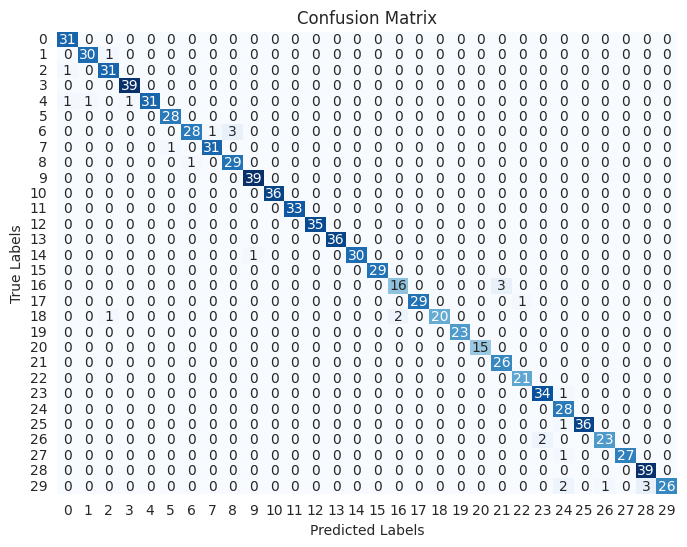

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Found 909 images belonging to 30 classes.


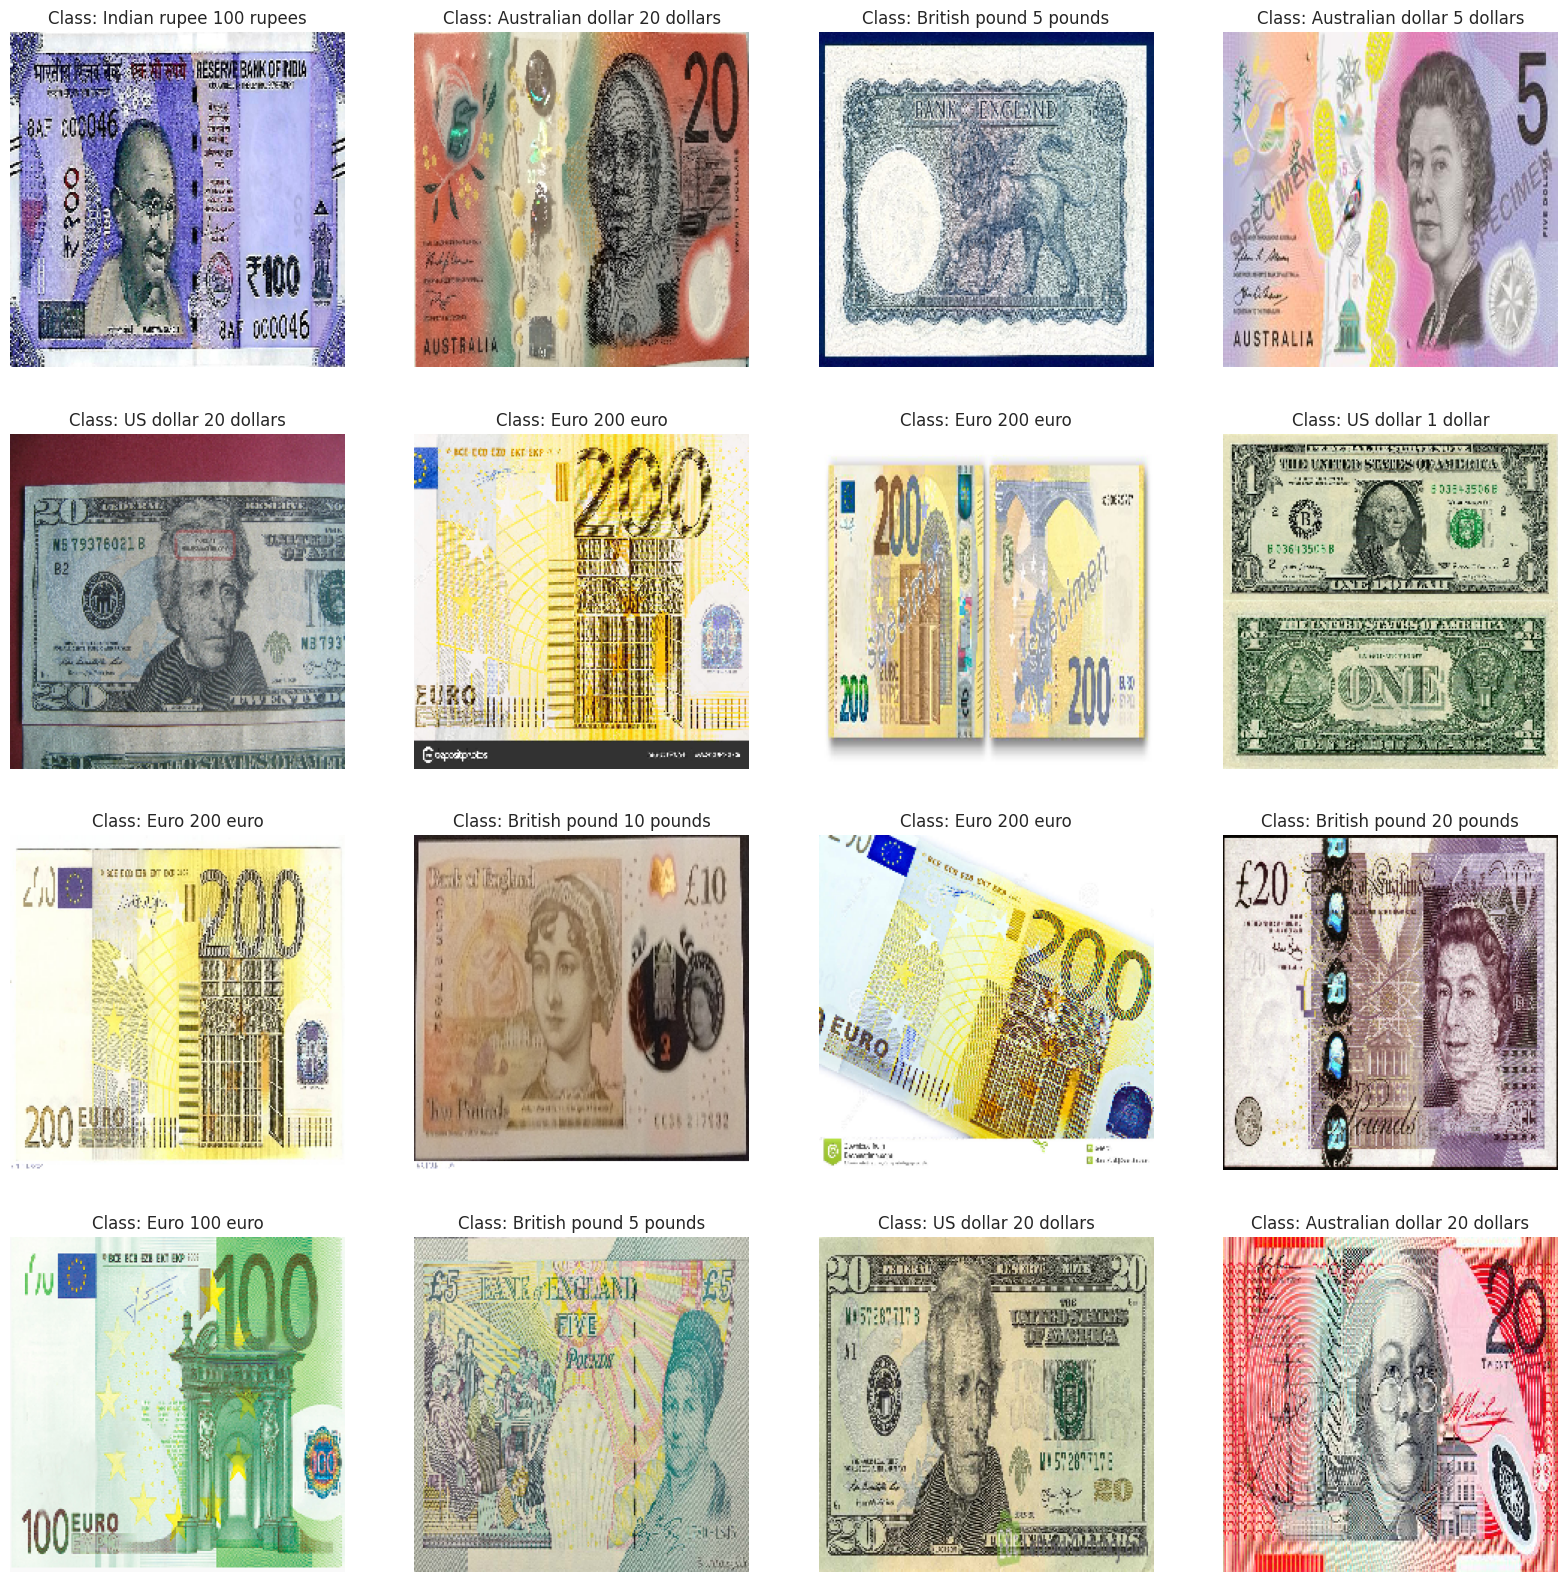

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Define the validation data generator
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    "/content/drive/MyDrive/PROJECTS/Currency prediction/Data",
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical')

# Extract a batch of images and labels using the `next` method
images, labels = next(val_generator)

# Plot the images
plt.figure(figsize=(20, 20))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    img = images[i]
    label_index = np.argmax(labels[i])
    class_name = class_names[label_index]
    plt.imshow(img)
    ax.set_title('Class: {}'.format(class_name))
    plt.axis('off')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/PROJECTS/Currency prediction/models/model-96.76%.h5')

# Define the test data generator
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/PROJECTS/Currency prediction/Data",
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False)
preds = model.predict(test_generator)
predicted_class_indices = np.argmax(preds, axis=1)
class_names = list(test_generator.class_indices.keys())
filenames = test_generator.filenames
for i in range(len(predicted_class_indices)):
    print('Prediction: {} - {}'.format(class_names[predicted_class_indices[i]], filenames[i]))


Found 909 images belonging to 30 classes.
909/909 [==============================] - 34s 36ms/step
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_1.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_11.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_12.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_13.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_14.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_15.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_17.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_2.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_20.jpg
Prediction: Australian dollar 10 dollars - Australian dollar 10 dollars/Image_21.jpg
Prediction: Australian dollar 10 dollars - Australian

In [ ]:
!pip install gradio

In [ ]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/PROJECTS/Currency prediction/Data"
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['Australian dollar 10 dollars' 'Australian dollar 100 dollars'
 'Australian dollar 20 dollars' 'Australian dollar 5 dollars'
 'Australian dollar 50 dollars' 'British pound 10 pounds'
 'British pound 20 pounds' 'British pound 5 pounds'
 'British pound 50 pounds' 'Euro 10 euro' 'Euro 100 euro' 'Euro 20 euro'
 'Euro 200 euro' 'Euro 50 euro' 'Euro 500 euro' 'Europe euro 5 euro'
 'Indian rupee 10 rupees' 'Indian rupee 100 rupees'
 'Indian rupee 20 rupees' 'Indian rupee 200 rupees'
 'Indian rupee 2000 rupees' 'Indian rupee 50 rupees'
 'Indian rupee 500 rupees' 'US dollar 1 dollar' 'US dollar 10 dollars'
 'US dollar 100 dollars' 'US dollar 2 dollars' 'US dollar 20 dollars'
 'US dollar 5 dollars' 'US dollar 50 dollars']


In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
conversion_rates = {
    "Australian": {"US": 0.67, "Euro": 0.60, "British":0.54, "Indian": 54.89},
    "US": {"Australian": 1.49, "Euro": 0.90, "British": 0.80, "Indian": 81.85},
    "Euro": {"Australian": 1.66, "US": 1.11, "British": 0.89, "Indian": 90.87},
    "British": {"Australian": 1.85, "US": 1.24, "Euro": 1.11, "Indian": 101.68},
    "Indian": {"Australian": 0.018, "US": 0.012, "Euro": 0.011, "British": 0.0098}
}
model = load_model('/content/drive/MyDrive/PROJECTS/Currency prediction/models/model-96.76%.h5')

img_size = (224, 224)
def preprocess_image(image):
    if isinstance(image, str):
        image = load_img(image, target_size=img_size)
    elif isinstance(image, np.ndarray):
        image = Image.fromarray(image)
        image = image.resize(img_size)
    else:
        raise ValueError('Input must be a path-like string or numpy.ndarray')
    image = img_to_array(image)
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    return image

def predict_currency(image, target_currency):
    image = preprocess_image(image)
    prediction = model.predict(image)
    currency_denomination = class_names[np.argmax(prediction)]
    input_data = currency_denomination.split(" ")
    if len(input_data) == 3:
      currency,denomination,x = input_data
      y = None
    elif len(input_data) == 4:
      currency, x, denomination, y = input_data
    if currency == target_currency:
        conversion_rate = 1.0
    else:
        conversion_rate = conversion_rates[currency][target_currency]
    return currency, denomination, int(denomination) * conversion_rate
input_component = [gr.inputs.Image(label="Select an image of a currency"),gr.inputs.Dropdown(label="Select the currency to convert to", choices=["Australian","US","Euro","British","Indian"])]
output_component =[ gr.outputs.Label(label="Predicted currency"),gr.outputs.Label(label="denomination"),gr.outputs.Label(label="conversion_rate")]
gr.Interface(fn=predict_currency, inputs=input_component, outputs=output_component).launch(debug=True,share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.1

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3e3dc24365671ffb2c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


1/1 [==============================] - 0s 34ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://3e3dc24365671ffb2c.gradio.live
